In [1]:
# Q3 简单分析决定loanAmnt和interestRate的五个最重要因素。

# A1 Interviewee:
# LoanAmnout: 贷款金额、用户存款、还款习惯
# InterestRate: 储蓄金额来源(利润差值)、贷款金额(浮动空间)、用户存款(贷款风险)
# 市场: 经济周期、重大生产(民生)政策

In [2]:
# Q4 如果需要对loanAmnt建模，你认为合适的模型是什么？

# A1 Interviewer:
# 4万特征如何筛选

# A2 Interviewee:
# 回归分析。业务了解和目标变量直接相关的特征(LoanAmount: InterestRate, Revolving Balance)

# A3 Interviewer:
# MSE定义简单介绍一下

# A4 Interviewee:
# Error:预测值与真实值误差。MSE 误差平方均值，忽略预测值正负影响放大的误差均值准线。

# A5 Interviewer:
# Std 与 Std Error定义:

# A6 Interviewee:
# Std = sqrt(variance), 0.25~0.5 quantile = 1 std

In [3]:
# Q5 Follow-up Questions

# A1 Interviewer: 
# entropy公式解释一下

# A2 Interviewee：
# (信息)熵：单个数据点在数据集中出现概率与log收敛概率之积总和。
# 信息增益：(树模型)引入新变量后拆分的子数据集熵之和，与母集熵之差。解释‘引进变量’对降熵的重要性。

# A3 Interviewer: 
# entropy最混乱情况解释一下

# A4 Interviewee: 
# 数据点出现概率=1/N (完全均匀分布)

# A5 Interviewer: 
# 完全均匀分布的情况多吗？

# A6 Interviewee: 
# 在完全控制的理想状态下会出现，比如np.uniform()函数。实际应用场景绝对一直的情况非常少见，除非在实验环境中严格控制外部变量。
# 追加：工业生产与泛化大规模制造(内容生产、信息传播、垄断行业)相对普遍。

In [4]:
# pip install numpy_financial

In [5]:
# pip install pygal

In [6]:
# pip install cairosvg

In [7]:
# pip install pillow

In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from PIL import Image

import pygal 
import numpy_financial as npf
from statistics import stdev
import matplotlib.lines as lines
import sklearn as sk
from sklearn.linear_model import LinearRegression

import warnings 
warnings.filterwarnings("ignore")

In [9]:
df_raw = pd.read_csv(r'C:\Users\yidan\Desktop\Projects\潘凯 - risk control\test_0.csv')
cols  = df_raw.columns
class_col = ['id', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'verificationStatus', 'issueDate', 'purpose',
       'regionCode', 'delinquency_2years', 'pubRecBankruptcies',
       'totalAcc', 'initialListStatus', 'applicationType',
       'earliesCreditLine', 'title', 'policyCode']

num_col = ['id'] + [i for i in cols if i not in class_col]

### | 数据清理：缺失值

In [10]:
def any_missing_row(df):

    missing_df = pd.DataFrame(df.isnull().any()).reset_index().rename(columns={'index':'cols', 0:'missing(T/F)'})
    missing_cols = [i for i in missing_df[missing_df['missing(T/F)'] == True]['cols'].values]
    missing_rows = [i for i in np.where(df.isna().any(axis=1))[0]]
    
#     print('column with (any) missing vals: \n'+str(missing_cols))
    return df[cols].iloc[missing_rows]

any_missing_row(df_raw)

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode
15,800015,15000.0,3,5.32,451.73,A,A1,54.0,NaN,1,...,0.0,0.0,27712.0,50.8,22.0,0,0,Aug-1983,0.0,1.0
17,800017,16000.0,3,12.29,533.65,C,C1,54.0,NaN,0,...,0.0,0.0,5453.0,99.1,7.0,1,0,Mar-2002,0.0,1.0
31,800031,7000.0,3,7.35,217.27,A,A4,54.0,NaN,0,...,1.0,0.0,6689.0,35.4,12.0,0,0,Sep-1993,4.0,1.0
40,800040,8500.0,3,15.77,297.88,D,D1,54.0,NaN,1,...,2.0,1.0,4975.0,51.3,19.0,0,1,Sep-2006,0.0,1.0
43,800043,15000.0,3,12.69,503.18,C,C2,54.0,NaN,0,...,0.0,0.0,27074.0,34.9,40.0,0,0,Dec-2003,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199942,999942,9100.0,3,23.87,356.40,E,E2,54.0,NaN,1,...,0.0,0.0,7110.0,71.8,11.0,0,0,Jul-2000,0.0,1.0
199948,999948,7500.0,3,18.99,274.89,D,D3,54.0,NaN,1,...,1.0,1.0,3761.0,12.7,38.0,1,0,May-1994,0.0,1.0
199988,999988,4600.0,3,15.31,160.16,C,C5,54.0,NaN,1,...,0.0,0.0,6448.0,80.6,22.0,0,0,Apr-2006,0.0,1.0
199990,999990,25000.0,3,7.62,779.04,A,A3,54.0,NaN,0,...,0.0,0.0,7859.0,11.0,39.0,1,0,Jul-1989,7664.0,1.0


### | 数据处理：填补缺失值

In [11]:
# 填补 employmentLength 空缺值
df_raw['employmentLength'] = df_raw['employmentLength'].fillna(10) 
any_missing_row(df_raw)

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode
503,800503,19000.0,3,13.55,645.24,D,D4,246906.0,10+ years,0,...,0.0,NaN,9416.0,95.1,13.0,1,0,Jun-1993,76.0,1.0
1112,801112,29775.0,5,15.61,717.92,D,D1,36486.0,9 years,0,...,0.0,0.0,0.0,NaN,21.0,0,0,Aug-1992,0.0,1.0
2999,802999,6000.0,3,14.99,207.97,C,C5,54.0,10,0,...,0.0,0.0,0.0,NaN,12.0,1,0,Aug-1984,8.0,1.0
3928,803928,4000.0,3,16.55,141.72,D,D2,97.0,2 years,1,...,0.0,0.0,0.0,NaN,11.0,1,0,Sep-1996,6.0,1.0
4879,804879,10850.0,5,23.63,309.81,F,F3,302426.0,< 1 year,0,...,0.0,0.0,0.0,NaN,22.0,0,0,May-2002,189.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194234,994234,3000.0,3,12.85,100.87,B,B4,211576.0,10+ years,1,...,0.0,0.0,0.0,NaN,17.0,1,0,Jan-2000,0.0,1.0
195731,995731,10000.0,3,15.05,346.90,C,C4,54.0,10,0,...,0.0,0.0,6703.0,89.4,17.0,0,1,Jan-2011,11.0,1.0
196718,996718,7500.0,3,20.00,278.73,D,D4,54.0,10,0,...,0.0,0.0,15910.0,96.4,13.0,0,1,May-2007,0.0,1.0
197119,997119,12000.0,5,15.99,291.76,C,C5,659.0,10+ years,2,...,0.0,0.0,0.0,NaN,16.0,0,0,Jul-1989,0.0,1.0


In [12]:
df_raw[df_raw['id'] == 800503 ]['issueDate']

503    2008-03-01
Name: issueDate, dtype: object

In [13]:
# 填补 dti 空缺值：没有年收入记录时，还款率(DTI) 为空值
# DTI = loanAmnt / (annualIncome/12)
df_missing = any_missing_row(df_raw)
df_missing[['id', 'dti', 'loanAmnt', 'term', 'interestRate', 'annualIncome']]

,id,dti,loanAmnt,term,interestRate,annualIncome
503,800503,1.67,19000.0,3,13.55,144000.0
1112,801112,9.05,29775.0,5,15.61,125000.0
2999,802999,14.91,6000.0,3,14.99,43000.0
3928,803928,32.04,4000.0,3,16.55,30000.0
4879,804879,16.85,10850.0,5,23.63,85200.0
...,...,...,...,...,...,...
194234,994234,24.94,3000.0,3,12.85,74000.0
195731,995731,NaN,10000.0,3,15.05,0.0
196718,996718,NaN,7500.0,3,20.00,0.0
197119,997119,24.96,12000.0,5,15.99,54000.0


In [14]:
df_class = df_raw[class_col]
df_numrs = df_raw[num_col]
df_class.head(5)

,id,grade,subGrade,employmentTitle,employmentLength,homeOwnership,verificationStatus,issueDate,purpose,regionCode,delinquency_2years,pubRecBankruptcies,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode
0,800000,B,B3,7027.0,10+ years,0,0,2014-07-01,0,21,1.0,0.0,29.0,0,0,Nov-1974,0.0,1.0
1,800001,C,C5,60426.0,10+ years,0,0,2015-07-01,2,8,2.0,0.0,14.0,0,0,Jul-2001,5.0,1.0
2,800002,D,D4,23547.0,2 years,1,2,2016-10-01,0,20,0.0,0.0,43.0,1,0,Aug-2006,0.0,1.0
3,800003,C,C4,636.0,4 years,0,1,2014-11-01,4,11,0.0,1.0,18.0,0,0,Jul-2002,4.0,1.0
4,800004,D,D1,368446.0,< 1 year,1,1,2017-10-01,0,8,0.0,0.0,22.0,0,0,Dec-2000,0.0,1.0


In [15]:
if len(df_class) == df_class['id'].count():
    print('The record is uniquely id-based.')

else:
    print('There are {0} duplicate records. '.format(len(df_class) - df_class['id'].count()))

The record is uniquely id-based.


# 分类特征

### | Grade & sub-Grade Cnt： 20万用户中57%用户集中在B、C段，子组均匀分布在1万人/小组。

In [16]:
df_grade_grby = df_class.groupby(['grade'])['id'].count().sort_values(ascending = False)
df_grade_grby = pd.DataFrame(df_grade_grby).reset_index().rename(columns = {'id':'id_cnt'})
df_grade_grby

,grade,id_cnt
0,B,58365
1,C,56701
2,A,34927
3,D,29924
4,E,14010
5,F,4698
6,G,1375


In [17]:
df_class_sub = df_class[ (df_class.grade == 'B') | (df_class.grade == 'C') ]
print('B/C Ratio:{0}%'.format(df_class_sub['id'].count()/df_class['id'].count()*100))
df_subgrade_grby = df_class_sub.groupby(['grade', 'subGrade'])['id'].count().sort_values(ascending = False)
df_subgrade_grby = pd.DataFrame(df_subgrade_grby).reset_index().rename(columns = {'id':'id_cnt'})
df_subgrade_grby

B/C Ratio:57.533%


,grade,subGrade,id_cnt
0,C,C1,12857
1,B,B4,12423
2,B,B5,12400
3,B,B3,12100
4,C,C2,11791
5,C,C4,11110
6,C,C3,11018
7,B,B2,10898
8,B,B1,10544
9,C,C5,9925


### | employmentTitle: B/C组115,066 用户中，0%的人身兼数职, 59%的职务都有至少2人。

In [18]:
df_class_emp = df_class[ (df_class.grade == 'B') | (df_class.grade == 'C')]
BC_total = int(df_class_sub['id'].count())
print('B/C total: ', BC_total, '\n')

ns = [2, 5 , 10, 100]
for n in ns:
    df_emp_cnt_all = pd.DataFrame(df_class_emp.groupby(['grade','employmentTitle'])['id'].count().sort_values(ascending = False)).reset_index().rename(columns = {'id': 'id_cnt'})
    BC_more_n = (df_emp_cnt_all[df_emp_cnt_all.id_cnt >= n].sum())['id_cnt']
    # BC_more_10
    print('在B/C组中，人数大于'+str(n)+'人的职务占: '+str(round(BC_more_n/ BC_total*100, 4)) + '%')

    df_emp_cnt_all = pd.DataFrame(df_class_emp.groupby(['grade','id'])['employmentTitle'].count().sort_values(ascending = True)).reset_index().rename(columns = {'employmentTitle': 'emp_cnt'})
    BC_more_n = (df_emp_cnt_all[df_emp_cnt_all.emp_cnt >= n].sum())['emp_cnt']
    print('B/C组中，职务大于'+str(n)+'个的人占: '+str(round(BC_more_n/ BC_total*100, 4)) + '%' + '\n')

B/C total:  115066 

在B/C组中，人数大于2人的职务占: 59.0122%
B/C组中，职务大于2个的人占: 0.0%

在B/C组中，人数大于5人的职务占: 45.9832%
B/C组中，职务大于5个的人占: 0.0%

在B/C组中，人数大于10人的职务占: 39.2801%
B/C组中，职务大于10个的人占: 0.0%

在B/C组中，人数大于100人的职务占: 19.8469%
B/C组中，职务大于100个的人占: 0.0%



In [19]:
df_emp_cnt = df_class_emp.groupby(['grade', 'employmentTitle'])['id'].count().sort_values(ascending = False)
df_emp_cnt = pd.DataFrame(df_emp_cnt).reset_index().rename(columns = {'id':'id_cnt'})

df_emp_cnt['emp_type'] = ''
df_emp_cnt.loc[df_emp_cnt.id_cnt >= 3000, "emp_type"] = 'Top'
# df_emp_cnt.loc[(df_emp_cnt.id_cnt < 3000) and (df_emp_cnt.id_cnt >= 2000), "emp_type"] = 'Mid-Up'
# df_emp_cnt.loc[(df_emp_cnt.id_cnt < 2000) and (df_emp_cnt.id_cnt >= 1000), "emp_type"] = 'Mid-Down'
df_emp_cnt.loc[df_emp_cnt.id_cnt < 1000 , "emp_type"] = 'Down'
df_emp_cnt

,grade,employmentTitle,id_cnt,emp_type
0,B,54.0,3670,Top
1,C,54.0,3654,Top
2,C,38.0,975,Down
3,B,38.0,948,Down
4,C,32.0,855,Down
...,...,...,...,...
55467,C,53700.0,1,Down
55468,C,53678.0,1,Down
55469,C,53677.0,1,Down
55470,C,53661.0,1,Down


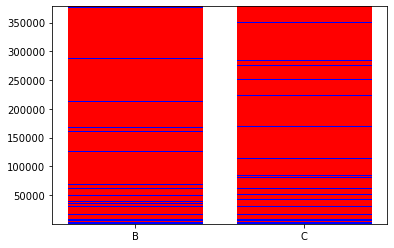

In [20]:
# 条形统计图全图覆盖：B/C各组employmentTitle和各组人数基本均匀分布。
x = df_emp_cnt.grade
y1 = df_emp_cnt.employmentTitle
y2 = df_emp_cnt.id_cnt

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
# ax.set_title("Number of id by employment title under each grade")
# ax.legend(loc="upper right")
plt.show()

### | employmentLength: B/C组别以对称占比新(近3年)老客户(大于10年)总和过半，且年度均值占3%-4%以上,且逐年流失。

In [21]:
df_emplen_grby = df_class.groupby(['employmentLength'])['id'].count().sort_values(ascending = False)
df_emplen_grby = pd.DataFrame(df_emplen_grby).reset_index().rename(columns = {'id':'id_cnt'})

In [22]:
def convert_cate_2_num(df, col):
    
    """ 一次性分析,仅限本pipe """
    
    df.loc[df[col] == '10+ years', col] = 11
    df.loc[df[col] == '9 years', col] = 9
    df.loc[df[col] == '8 years', col] = 8
    df.loc[df[col] == '7 years', col] = 7
    df.loc[df[col] == '6 years', col] = 6
    df.loc[df[col] == '5 years', col] = 5
    df.loc[df[col] == '4 years', col] = 4
    df.loc[df[col] == '3 years', col] = 3
    df.loc[df[col] == '2 years', col] = 2
    df.loc[df[col] == '1 year', col] = 1
    df.loc[df[col] == '< 1 year', col] = 0.5
    
convert_cate_2_num(df_class_sub, 'employmentLength')
print(df_class_sub['employmentLength'])
df_class_sub['employmentLength'] = df_class_sub['employmentLength'].fillna(10) 

df_class_sub.isnull().any()

0          11
1          11
3           4
6          11
11        0.5
         ... 
199992      6
199993      8
199994      5
199995      7
199997      8
Name: employmentLength, Length: 115066, dtype: object


id                    False
grade                 False
subGrade              False
employmentTitle       False
employmentLength      False
homeOwnership         False
verificationStatus    False
issueDate             False
purpose               False
regionCode            False
delinquency_2years    False
pubRecBankruptcies     True
totalAcc              False
initialListStatus     False
applicationType       False
earliesCreditLine     False
title                 False
policyCode            False
dtype: bool

In [23]:
# cross-check data type after filling missing values
df_raw.employmentLength

0         10+ years
1         10+ years
2           2 years
3           4 years
4          < 1 year
            ...    
199995      7 years
199996       1 year
199997      8 years
199998      4 years
199999      7 years
Name: employmentLength, Length: 200000, dtype: object

In [24]:
df_emplen_grby = df_class_sub.groupby(['grade', 'employmentLength'])['id'].count().sort_values(ascending = False)
df_emplen_grby = pd.DataFrame(df_emplen_grby).reset_index().rename(columns = {'id':'id_cnt'})
# df_emplen_grby

B/C组别以对称占比新老客户总和过半


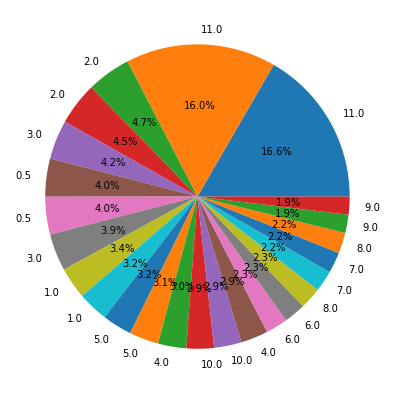

In [25]:
lab = df_emplen_grby.employmentLength.tolist()
data = df_emplen_grby.id_cnt.tolist()
 
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lab, autopct='%1.1f%%')
print('B/C组别以对称占比新老客户总和过半')
plt.show()

### | homeOwnership：半数人无房产，40%一部房产，9%左右大于2处房产。1%以内人多达5处房产。

In [26]:
df_homeown_grby = df_class_sub.groupby(['grade', 'homeOwnership'])['id'].count().sort_values(ascending = False)
df_homeown_grby = pd.DataFrame(df_homeown_grby).reset_index().rename(columns = {'id':'id_cnt'})
df_homeown_grby

,grade,homeOwnership,id_cnt
0,B,0,28984
1,C,0,27043
2,C,1,23580
3,B,1,23162
4,B,2,6203
5,C,2,6061
6,B,3,10
7,C,3,9
8,C,5,6
9,B,5,5


B/C组起始置房比(不超过2套)占99.9713%


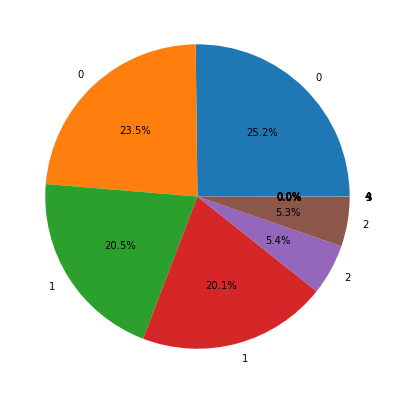

In [27]:
lab = df_homeown_grby.homeOwnership.tolist()
data = df_homeown_grby.id_cnt.tolist()
 
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lab, autopct='%1.1f%%')

major_group = df_homeown_grby[df_homeown_grby.homeOwnership <= 2 ]
ratio = str(round(major_group.id_cnt.sum() / df_homeown_grby.id_cnt.sum()*100,4))
print('B/C组起始置房比(不超过2套)占'+ ratio + '%')
plt.show()

### | verificationStatus	issueDate

In [28]:
df_issue = df_class_sub[['id', 'grade', 'verificationStatus', 'issueDate']]
df_issue_cnt = pd.DataFrame(df_issue.groupby(['grade',  'verificationStatus'])['id'].count().sort_values(ascending = False)).reset_index().rename(columns = {'id':'id_cnt'})
df_issue_cnt.head(10)

,grade,verificationStatus,id_cnt
0,C,1,23026
1,B,1,22985
2,B,0,20551
3,C,2,18970
4,B,2,14829
5,C,0,14705


B/C验证率高达80%+


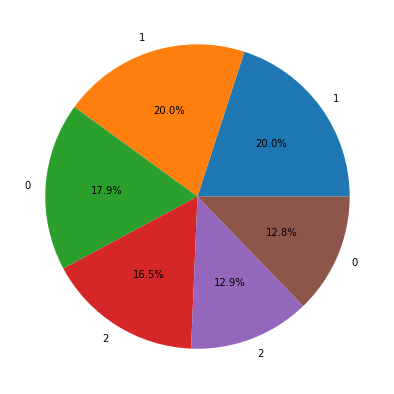

In [29]:
lab = df_issue_cnt.verificationStatus.tolist()
data = df_issue_cnt.id_cnt.tolist()
 
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lab, autopct='%1.1f%%')

print('B/C验证率高达80%+')
plt.show()

In [30]:
df_issue_dt_cnt = pd.DataFrame(df_issue.groupby(['issueDate',  'verificationStatus'])['id'].count().sort_values(ascending = False)).reset_index().rename(columns = {'id':'id_cnt'})
df_issue_dt_cnt

,issueDate,verificationStatus,id_cnt
0,2016-03-01,1,1810
1,2015-10-01,1,1738
2,2015-12-01,1,1501
3,2015-07-01,1,1368
4,2016-02-01,1,1330
...,...,...,...
378,2007-07-01,0,2
379,2010-03-01,1,1
380,2008-09-01,2,1
381,2008-12-01,1,1


### | verificationDate: 69%用户已(多次)验证，验证在purpose 4之后分层显著

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.so.2'
cannot load library 'libcairo.2.dylib': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.2.dylib'
cannot load library 'libcairo-2.dll': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo-2.dll'

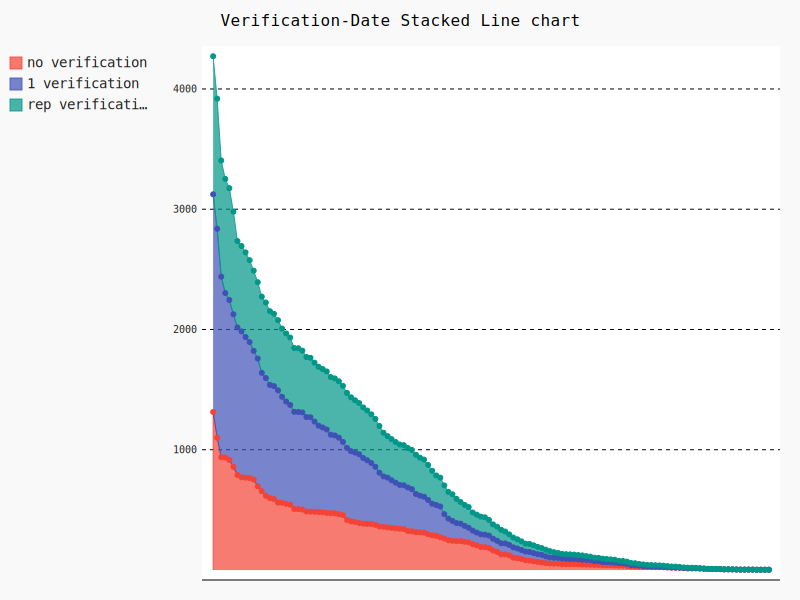

In [31]:
line_chart = pygal.StackedLine(fill=True)  
line_chart.title = 'Verification-Date Stacked Line chart'
  
A = df_issue_dt_cnt[df_issue_dt_cnt.verificationStatus == 0]['id_cnt'].tolist()
B = df_issue_dt_cnt[df_issue_dt_cnt.verificationStatus == 1]['id_cnt'].tolist()
C = df_issue_dt_cnt[df_issue_dt_cnt.verificationStatus == 2]['id_cnt'].tolist()

line_chart.add('no verification', A) 
line_chart.add('1 verification', B) 
line_chart.add('rep verification', C)   
line_chart

# 此处 warning 对可视结果不影响，请忽略

In [32]:
print('验证最早时间：', df_issue[df_issue.verificationStatus > 0]['issueDate'].min())
print('验证最晚时间：', df_issue[df_issue.verificationStatus > 0]['issueDate'].max())

print('未验证最早时间：', df_issue[df_issue.verificationStatus == 0]['issueDate'].min())
print('未验证最晚时间：', df_issue[df_issue.verificationStatus == 0]['issueDate'].max())

print('验证率：'+ str(round(df_issue[df_issue.verificationStatus > 0]['id'].count()/df_issue.verificationStatus.count()*100, 4)) +'%')

验证最早时间： 2008-05-01
验证最晚时间： 2018-12-01
未验证最早时间： 2007-07-01
未验证最晚时间： 2018-12-01
验证率：69.3602%


OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.so.2'
cannot load library 'libcairo.2.dylib': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.2.dylib'
cannot load library 'libcairo-2.dll': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo-2.dll'

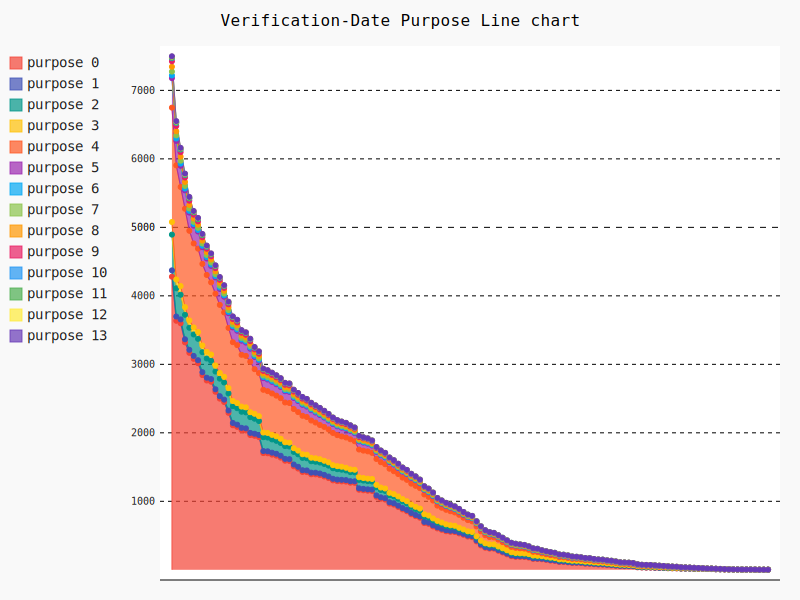

In [33]:
df_purpose = df_raw[['id', 'grade', 'issueDate', 'purpose']]
df_purpose = pd.DataFrame(df_purpose.groupby(['issueDate',  'purpose'])['id'].count().sort_values(ascending = False)).reset_index().rename(columns = {'id':'id_cnt'})

line_chart = pygal.StackedLine(fill=True)  
line_chart.title = 'Verification-Date Purpose Line chart'
  
A = df_purpose[df_purpose.purpose == 0]['id_cnt'].tolist()
B = df_purpose[df_purpose.purpose == 1]['id_cnt'].tolist()
C = df_purpose[df_purpose.purpose == 2]['id_cnt'].tolist()
D = df_purpose[df_purpose.purpose == 3]['id_cnt'].tolist()
E = df_purpose[df_purpose.purpose == 4]['id_cnt'].tolist()
F = df_purpose[df_purpose.purpose == 5]['id_cnt'].tolist()
G = df_purpose[df_purpose.purpose == 6]['id_cnt'].tolist()
H = df_purpose[df_purpose.purpose == 7]['id_cnt'].tolist()
I = df_purpose[df_purpose.purpose == 8]['id_cnt'].tolist()
J = df_purpose[df_purpose.purpose == 9]['id_cnt'].tolist()
K = df_purpose[df_purpose.purpose == 10]['id_cnt'].tolist()
L = df_purpose[df_purpose.purpose == 11]['id_cnt'].tolist()
M = df_purpose[df_purpose.purpose == 12]['id_cnt'].tolist()
N = df_purpose[df_purpose.purpose == 13]['id_cnt'].tolist()

k = 0
for i in [A, B, C, D, E, F, G, H, I, J, K, L, M, N]:
    line_chart.add('purpose {0}'.format(str(k)), i) 
    k += 1

line_chart 

# 此处 warning 对可视结果不影响，请忽略

### | regionCode: 地区基数>1000人时，部分区域有超过5%市场占比

In [34]:
df_region = df_raw[['id', 'grade', 'regionCode']]
df_region_cnt = pd.DataFrame(df_region.groupby(['grade',  'regionCode'])['id'].count().sort_values(ascending = False)).reset_index().rename(columns = {'id':'id_cnt'})
df_region_cnt

,grade,regionCode,id_cnt
0,B,8,8683
1,C,8,8046
2,A,8,5159
3,B,13,4768
4,B,14,4742
...,...,...,...
346,G,39,1
347,B,50,1
348,G,29,1
349,G,47,1


用户基数大于1000地区编码占比


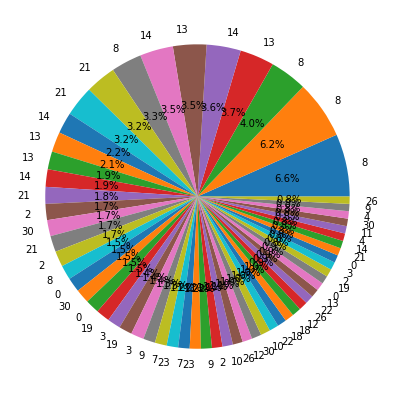

In [35]:
n = 1000
df_regions = df_region_cnt[df_region_cnt.id_cnt >= n]
lab = df_regions.regionCode.tolist()
data = df_regions.id_cnt.tolist()
 
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lab, autopct='%1.1f%%')

print('用户基数大于{0}地区编码占比'.format(str(n)))
plt.show()

### | delinquency_2years 逾期记录：两年内80%用户无逾期记录。低风险逾期2次内用户占多数。

In [36]:
value_count = df_class.delinquency_2years.value_counts()
df_liq = pd.DataFrame(value_count).reset_index().rename(columns = {'index':'val', 'delinquency_2years':'counts'})

In [37]:
def summaries(col):
    min_v = col.min()
    quantile1 = col.quantile(0.25)
    mean = col.mean()
    median = col.median()
    std = stdev(col)
    quantile2 = col.quantile(0.75)
    max_v = col.max()

    print('Summarized Data \nMin: {0}\n1st Quantile: {1}\nMean: {2}\nMedian: {3}\n2nd Quantile: {4}\nMax: {5}'.format(min_v, quantile1, mean, median, quantile2, max_v))
    
summaries(df_class.delinquency_2years)  

Summarized Data 
Min: 0.0
1st Quantile: 0.0
Mean: 0.315895
Median: 0.0
2nd Quantile: 0.0
Max: 28.0


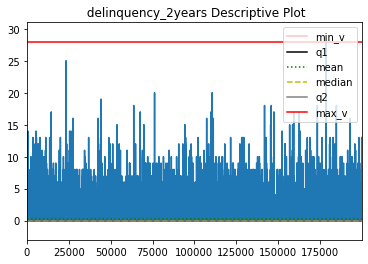

In [38]:
def line_plot(col, min_v = np.nan, q1 = np.nan, mean = np.nan, median = np.nan, q2 = np.nan, max_v = np.nan):
    
    fig, ax = plt.subplots()   
    x = [i for i in range(len(col))]
    y = col.values
    ax.plot(x, y)
    ax.set_xlim(0, max(x)) 
    ax.set_ylim(min(y)-3, max(y)+3) 
    
    plt.axhline(y=min_v, c = 'pink', label = 'min_v')
    plt.axhline(y=q1, c = 'black', label = 'q1')
    plt.axhline(y=mean, c = 'g', label = 'mean', linestyle = ':')
    plt.axhline(y=median, c = 'y', label = 'median', linestyle = '--')
    plt.axhline(y=q2, c = 'grey', label = 'q2')
    plt.axhline(y=max_v, c = 'r', label = 'max_v')

    plt.legend(loc = 'upper right')
    plt.title('{0} Descriptive Plot'.format(str(col).split(',')[0].split(':')[1]))
    plt.show()
    
line_plot(df_class.delinquency_2years, min_v = 0,q1 = 0, mean = 0.315895, median = 0, q2 = 0, max_v = 28)

总逾期占比


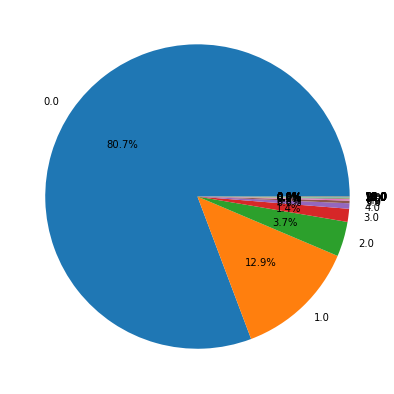

In [39]:
lab = df_liq.val.tolist()
data = df_liq.counts.tolist()
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lab, autopct='%1.1f%%')

print('总逾期占比')
plt.show()

逾期占比


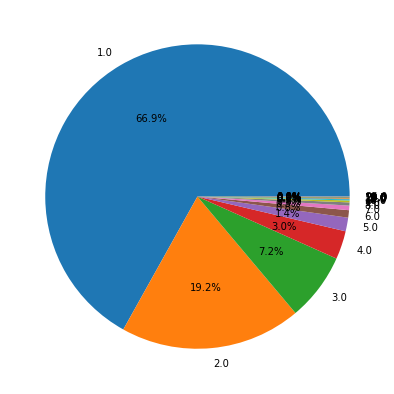

In [40]:
value_count = df_class.delinquency_2years.value_counts()
df_liq = pd.DataFrame(value_count).reset_index().rename(columns = {'index':'val', 'delinquency_2years':'counts'})
df_deliq = df_liq[df_liq.val != 0]

lab = df_deliq.val.tolist()
data = df_deliq.counts.tolist()
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lab, autopct='%1.1f%%')

print('逾期占比')
plt.show()

### | pubRecBankruptcies 破产率： 87%以上用户不存在破产记录，一次破产者达11.75%，连续破产者达.75%.

In [41]:
summaries(df_class.pubRecBankruptcies)  

Summarized Data 
Min: 0.0
1st Quantile: 0.0
Mean: 0.13529347021272337
Median: 0.0
2nd Quantile: 0.0
Max: 11.0


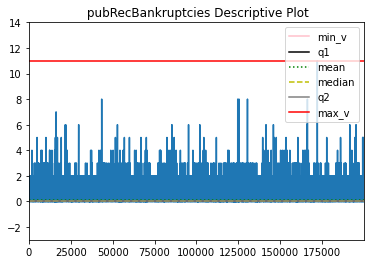

In [42]:
line_plot(df_class.pubRecBankruptcies, min_v = 0,q1 = 0, mean = 0.13529347021272337, median = 0, q2 = 0, max_v = 11)

破产总比


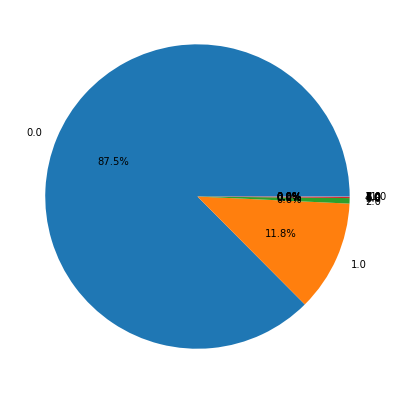

In [43]:
value_count = df_class.pubRecBankruptcies.value_counts()
df_bnk = pd.DataFrame(value_count).reset_index().rename(columns = {'index':'val', 'pubRecBankruptcies':'counts'})
df_deliq = df_liq[df_liq.val != 0]

lab = df_bnk.val.tolist()
data = df_bnk.counts.tolist()
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lab, autopct='%1.1f%%')

print('破产总比')
plt.show()

破产占比（占总比12.5%）


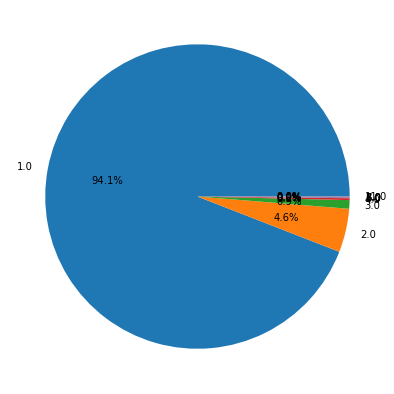

In [44]:
value_count = df_class.pubRecBankruptcies.value_counts()
df_bnk = pd.DataFrame(value_count).reset_index().rename(columns = {'index':'val', 'pubRecBankruptcies':'counts'})
df_bnkrpy = df_bnk[df_bnk.val != 0]

lab = df_bnkrpy.val.tolist()
data = df_bnkrpy.counts.tolist()
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lab, autopct='%1.1f%%')

print('破产占比（占总比12.5%）')
plt.show()

申请种类占比


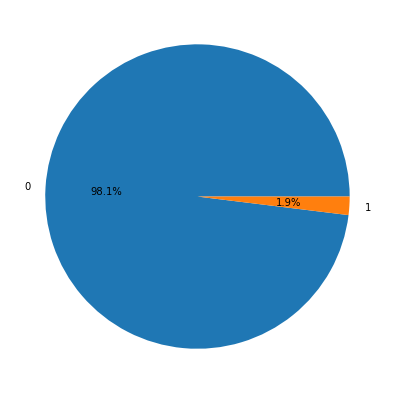

In [45]:
df_app = df_class[['id', 'applicationType']]
df_app_grby = df_app.groupby(['applicationType'])['id'].count().sort_values(ascending = False)
df_app_grby = pd.DataFrame(df_app_grby).reset_index().rename(columns = {'id':'counts'})

lab = df_app_grby.applicationType.tolist()
data = df_app_grby.counts.tolist()
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lab, autopct='%1.1f%%')

print('申请种类占比')
plt.show()

### |  早申请时间：近期(2000年)早申请时间激增，临近金融泡沫。

In [46]:
df_crline = df_class[['id', 'earliesCreditLine']]
df_crline_grby = df_crline.groupby(['earliesCreditLine'])['id'].count().sort_values(ascending = False)
df_crline_grby = pd.DataFrame(df_crline_grby).reset_index().rename(columns = {'id':'counts'})
df_crline_grby[df_crline_grby.counts>=1000]

,earliesCreditLine,counts
0,Aug-2001,1390
1,Oct-2001,1378
2,Aug-2002,1376
3,Sep-2002,1368
4,Sep-2004,1337
5,Aug-2003,1312
6,Sep-2003,1307
7,Oct-2000,1300
8,Aug-2000,1288
9,Oct-2002,1271


OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.so.2'
cannot load library 'libcairo.2.dylib': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.2.dylib'
cannot load library 'libcairo-2.dll': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo-2.dll'

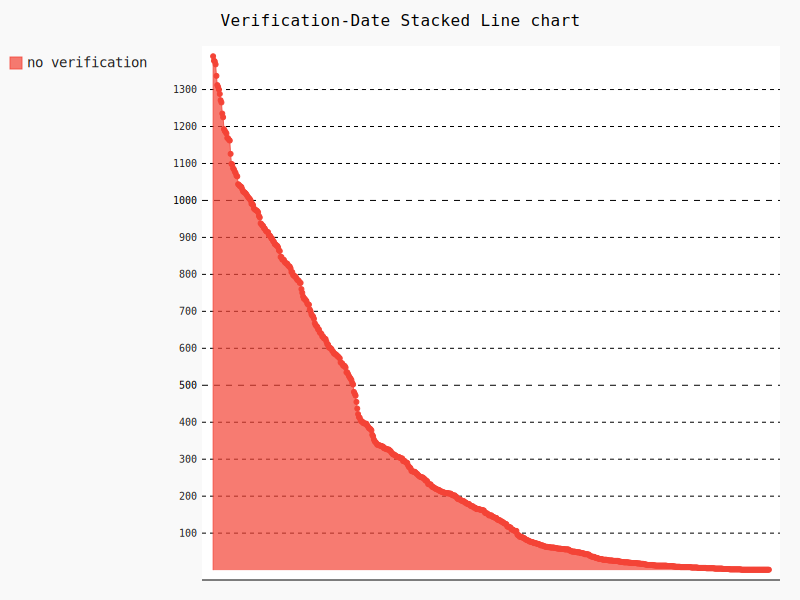

In [47]:
line_chart = pygal.StackedLine(fill=True)  
line_chart.title = 'Verification-Date Stacked Line chart'
A = df_crline_grby['counts'].tolist()
line_chart.add('no verification', A) 
line_chart

# 此处 warning 对可视结果不影响，请忽略

### | 常见申请人职称

In [48]:
df_title = df_class[['id', 'title']]
df_title_grby = df_title.groupby(['title'])['id'].count().sort_values(ascending = False)
df_title_grby = pd.DataFrame(df_title_grby).reset_index().rename(columns = {'id':'counts'})
df_title_grby[df_title_grby.counts >= 500]

,title,counts
0,0.0,98066
1,4.0,37175
2,5.0,11034
3,6.0,9886
4,3.0,3603
5,2.0,2510
6,38.0,2320
7,10.0,2028
8,1.0,1682
9,9.0,1626


### | 20万所有借贷均来自policy 01

In [49]:
df_policy = df_class[['id', 'policyCode']]
df_policy_grby = df_policy.groupby(['policyCode'])['id'].count().sort_values(ascending = False)
df_policy_grby = pd.DataFrame(df_policy_grby).reset_index().rename(columns = {'id':'counts'})
df_policy_grby

,policyCode,counts
0,1.0,200000


# 数值列

In [50]:
# 因为 employmentLength 是时间数值列，所以基于数据处理中的分类列、数值列均有涉入。
df_numrs =  df_numrs.join(df_raw[['employmentLength']])
convert_cate_2_num(df_numrs, 'employmentLength')
df_numrs.head(5)

,id,loanAmnt,term,interestRate,installment,annualIncome,postCode,dti,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,revolBal,revolUtil,employmentLength
0,800000,14000.0,3,10.99,458.28,80000.0,163.0,10.56,715.0,719.0,17.0,0.0,9846.0,30.7,11
1,800001,20000.0,5,14.65,472.14,50000.0,235.0,21.40,670.0,674.0,5.0,0.0,8946.0,56.6,11
2,800002,12000.0,3,19.99,445.91,60000.0,526.0,33.50,710.0,714.0,12.0,0.0,970.0,17.6,2
3,800003,17500.0,5,14.31,410.02,37000.0,248.0,13.95,685.0,689.0,10.0,1.0,10249.0,52.3,4
4,800004,35000.0,3,17.09,1249.42,80000.0,115.0,24.97,685.0,689.0,19.0,0.0,33199.0,35.6,0.5


### | 标注数值变化最显著的列，删除无变化(统一值)数列

方差散点图
annualIncome Top 13 
variance 6031413734.328297


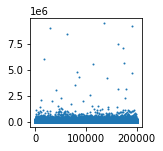

revolBal Top 12 
variance 503139029.6898459


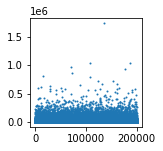

loanAmnt Top 11 
variance 76342306.98350304


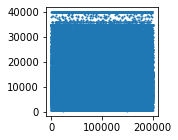

installment Top 10 
variance 68772.98654564196


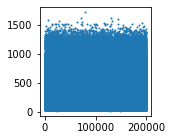

postCode Top 9 
variance 39900.74758658861


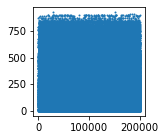

ficoRangeHigh Top 8 
variance 1014.6230877591087


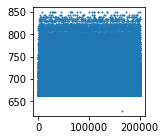

ficoRangeLow Top 7 
variance 1014.5842610400382


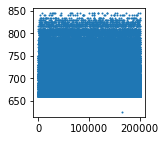

revolUtil Top 6 
variance 602.9867103955795


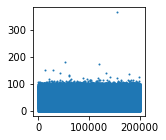

revolUtil Top 5 
variance 602.9867103955795


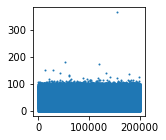

dti Top 4 
variance 132.1069123337551


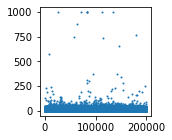

openAcc Top 3 
variance 29.76260548439152


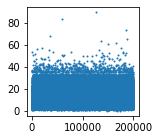

interestRate Top 2 
variance 22.719674655862697


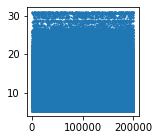

term Top 1 
variance 0.7313547438999499


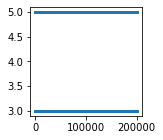

In [51]:
# postCode, installment分布过于均匀，已经没有可以抓取的特定规律。
# FicoRange高低取值一致，在不清楚评分标准无法解释。
# 暂时忽略。

cols = [ 'loanAmnt', 'term', 'interestRate', 'installment', 'annualIncome', 'postCode', 'dti', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',  'revolBal', 'revolUtil']

def top_vars(df, cols, n):
    
    top_col = ''
    df_vars = df[cols]
    while n > 0:
        
        if n == 5:
            top_col = ''

        else:
            cols = [i for i in cols if i != top_col]
            df_vars = df_vars[cols]
            
        vars = []
        for col in df_vars.columns:
            
            variance = np.var(df_vars[col])
            vars.append(variance)

        top_col = df_vars.columns[vars.index(max(vars))]

        print(top_col, 'Top', n, '\nvariance', max(vars))
        
        f = plt.figure() 
        f.set_figwidth(2) 
        f.set_figheight(2)
        plt.scatter(x = [i for i in range(df_raw['id'].index.stop)], y = df_vars[top_col], s = 1)
        plt.show()

        n-= 1
        
def bottom_vars(df, cols, n):
    
    bottom_col = ''
    df_vars = df[cols]
    max_n = n
    n = 1
    while n <= max_n:
        
        if n == max_n :
            bottom_col = ''

        else:
            cols = [i for i in cols if i != bottom_col]
            df_vars = df_vars[cols]
            
        vars = []
        for col in df_vars.columns:
            
            variance = np.var(df_vars[col])
            vars.append(variance)

        bottom_col = df_vars.columns[vars.index(min(vars))]

        print(bottom_col, 'Bottom', n, '\nvariance', min(vars))
        
        f = plt.figure() 
        f.set_figwidth(2) 
        f.set_figheight(2)
        plt.scatter(x = [i for i in range(df_raw['id'].index.stop)], y = df_vars[bottom_col], s = 1)
        plt.show()

        n+= 1
        
print('方差散点图')
top_vars(df_numrs, cols, len(cols))

pubRec Bottom 1 
variance 0.3678768190990583


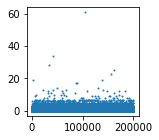

term Bottom 2 
variance 0.7313547438999499


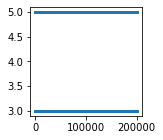

interestRate Bottom 3 
variance 22.719674655862697


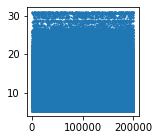

openAcc Bottom 4 
variance 29.76260548439152


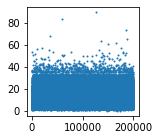

dti Bottom 5 
variance 132.1069123337551


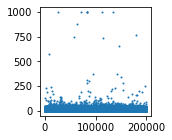

revolUtil Bottom 6 
variance 602.9867103955795


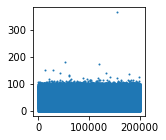

ficoRangeLow Bottom 7 
variance 1014.5842610400382


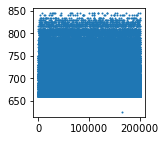

ficoRangeHigh Bottom 8 
variance 1014.6230877591087


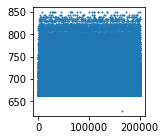

postCode Bottom 9 
variance 39900.74758658861


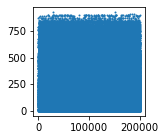

installment Bottom 10 
variance 68772.98654564196


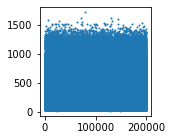

loanAmnt Bottom 11 
variance 76342306.98350304


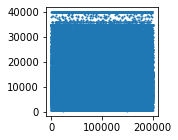

revolBal Bottom 12 
variance 503139029.6898459


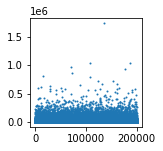

revolBal Bottom 13 
variance 503139029.6898459


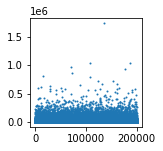

In [52]:
# variance无变化列，建模时可酌情忽略变量。
# ficoHigh Low: 历史最高值，最低值。issueDate时的得分。
bottom_vars(df_numrs, cols, len(cols))

### | 数值列去重，co-variance显著列留存重要列（与200-2万std/标准差对比。FicoRangeHigh/Low可根据中间值合并为一个特征。

所有数值数据查看高协方差值，标记高信息熵数列。分类模型中应去掉id列，作为极差（绝对均匀分布下的极限熵差）失效项。
• LoanAmount: [LoanAmount, [所有数值列]] -> loanAmount和所有数值特征都呈现正强相关关系。与取数团队确认后表示目前特征列没有经业务常识/模型筛选重要列。
• Term(期限: 年/3-5): [Term, annualIncome], [Term, revolBal] -> 数据20万用户为3、5年两种贷款记录。作为中长期贷款，用户年收入与收支均衡记录是正强相关的。
• InterestRate:[InterestRate, LoanAmount], [InterestRate, -AnnualIncome]?, [InterestRate, revolBal]  -> 贷额越高；利息越贵。年薪越高；贷款•利息月底可能因为贷款额度的需求比较低。贷款越贵，比如说利息越贵；收支均衡记录就越明显，比如计算信贷分值的尾款结余越大。
• Installment: [installment, loanAmount], [installment, annualIncome], [installment, postCode]?, [installment, ficoRangeLow，],[installment, ficoRangeHigh] -> Installment按流动月供还贷，则dti比率失效。为了保证数据的完整性，需要和定值团队确认一个0.5左右的缩小参数。
• annualIncome: [annualIncome, loanAmout], [annualIncome, term], [annualIncome, interestRate], [annualIncome, installment], [annualIncome, annualIncome], [annualIncome, postCode], [annualIncome, ficoRangeLow], [annualIncome, ficoRangeHigh], [annualIncome, openAcc], [annualIncome, revolBal], [annualIncome, employmentLength] -> 收入与愿意偿付的信用金额 publicRec 不强烈相关，publicRec 如何解释的？
• postCode: [postCode, loanAmount], [postCode, installment], [postCode, annualIncome], [postCode, revolBal] -> 邮编和借贷金额、还款投入、年收入、收支平衡强相关。借贷业务会根据地理区域资金硬性指标划分吗？
• ficoRangeLow: [ficoRangeLow, loanAmount], [ficoRangeLow, installment], [ficoRangeLow, annualIncome], [ficoRangeLow, ficoRangeHigh], [ficoRangeLow, revolBal] -> fico评分和还款习惯、信贷记录、人资产强相关。与ficoRangeHigh也强(正)相关。
• ficoRangeHigh: [ficoRangeHigh, loanAmount], [ficoRangeHigh, installment], [ficoRangeHigh, annualIncome], [ficoRangeHigh, revolBal] -> ficoHigh与ficoLow无强相关关系?
• openAcc: [openAcc, loanAmount], [openAcc, installment], [openAcc, annualIncome], [openAcc, revolBal] -> Acc?
• pubRec: [pubRec, loanAmount], [pubRec, revolBal] -> 公布信息？
• revolBal: [revolBal,所有列] -> ？经济持平固然是好的，为什么和所有列呈强相关
• employmentLength: [employmentLength, loanAmount], [employmentLength, annualIncome], [employmentLength, revolBal] -> 任职时间越久，越抗风险

### | postCode: 邮编200以内区域持有大量债务，且过万贷相对集中。

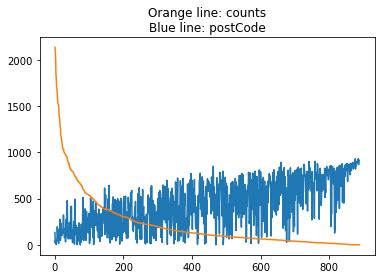

In [53]:
# 【Whipping Over the Buffallo】贷款业务量集中在邮编200内
value_count = pd.DataFrame(df_numrs.postCode.value_counts().reset_index().rename(columns = {'index':'postCode', 'postCode':'counts'}))
fig, ax = plt.subplots() 
ax.plot(value_count.index, value_count)
plt.title('Orange line: counts\nBlue line: postCode')
plt.show()

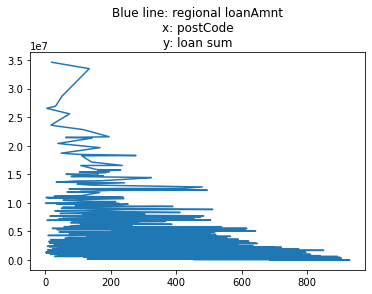

In [54]:
# 【The Diving Giant】邮编200内是高额贷款聚集区
df_sumloan_grby = pd.DataFrame(df_numrs.groupby(['postCode'])['loanAmnt'].sum().sort_values(ascending = False)).reset_index()
fig, ax = plt.subplots() 
plt.plot(df_sumloan_grby.postCode, df_sumloan_grby.loanAmnt)
plt.title('Blue line: regional loanAmnt\nx: postCode\ny: loan sum')
plt.show()

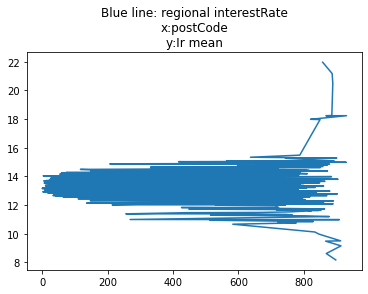

In [55]:
# 【Shooting Bullet】贷款利率主要集中在10-15%并集中在邮编0区域。邮编800+区域利率较为分散，利率跨度在8-22%不等。
df_sumloan_grby = pd.DataFrame(df_numrs.groupby(['postCode'])['interestRate'].mean().sort_values(ascending = False)).reset_index()
fig, ax = plt.subplots() 
ax.plot(df_sumloan_grby.postCode, df_sumloan_grby.interestRate)
plt.title('Blue line: regional interestRate\nx:postCode\ny:Ir mean')
plt.show()

In [56]:
# check postCode and assigned realm by geographic location
lst = sorted([int(i) for i in df_sumloan_grby.postCode.unique()], reverse = True)
print('Example zipcode:', lst[:5])

# Please choose image browsing app at first attempt. This block will run by 10 seconds to finish loading procedure.
img = Image.open(r'US ZipCode.jfif')
img.show()

Example zipcode: [931, 930, 914, 913, 909]


### | Deploy Model to find out linear relationship between {Zipcode, Intereat Rate} & {Zipcode, Loan Amount}

In [57]:
df_sumloan_grby

,postCode,interestRate
0,858.0,21.97000
1,887.0,21.18000
2,889.0,20.49000
3,886.0,18.25000
4,868.0,18.24000
...,...,...
884,913.0,9.51000
885,867.0,9.49000
886,914.0,9.16000
887,869.0,8.62625


In [ ]:
# Train data re-store by 2/8
threshold = len(df_sumloan_grby) * .8
X_train = pd.DataFrame(df_sumloan_grby.postCode.loc[ : threshold ])
X_test = pd.DataFrame(df_sumloan_grby.postCode.loc[threshold : ])
y_train = pd.DataFrame(df_sumloan_grby.interestRate.loc[ : threshold ])
y_test = pd.DataFrame(df_sumloan_grby.interestRate.loc[threshold : ])
print('Check test X')
X_test.head(5)

In [ ]:
# Build Model
lr = LinearRegression()
lr.fit(X_train_ir, y_train_ir)
y_pred = lr.predict(X_test)
print('Predicted Linear Interest Rate:', y_pred[:1][0][0])

# Model Eval - MSE
true = y_test.interestRate
pred = y_pred

errors = []
a_mean = np.mean(y_test.interestRate)
for ix in range(1, len(y_pred)+1):
    error = pred[ ix-1 : ix ][0][0] - a_mean
    errors.append(error)

postCode = [i for i in X_test.postCode] 
data = {'postCode': postCode, 'residual-model': errors}
MSE = pd.DataFrame(data)
MSE['mean-model'] = np.mean(y_test.interestRate)
MSE['se-model'] = MSE['residual-model'] ** 2
MSE['mse-model'] = MSE['se-model'] / len(MSE)

In [ ]:
# The Healing Scar in First Depression
# EDA by deplyed LR model on observant train set. Here we see what's coming supposingly true in relation between zipcode and interest rate.
plt.title('Model Performance - MSE')
plt.plot(postCode, MSE['mse-model'])
plt.xlabel('postCode')
plt.ylabel('Interest Rate MSE')

plt.show()
print('Concluison: The MidWest and South region have greater Interest variance within 2007-2020.')

In [ ]:
# LR Model on Zip Code & Loan Amount


In [ ]:
# tips: 贷款区域分布冷静而均匀；对应的贷款金额【分层现象】明显，主要贷款发烧般集中在【大额(35000)】与冷静区申请的小【额贷(1000内)】。
df_pcdloan_grby = pd.DataFrame(df_numrs.groupby(['postCode'])['loanAmnt'].mean().sort_values(ascending = False)).reset_index()
# df_pcdir_grby = pd.DataFrame(df_numrs.groupby(['postCode'])['interestRate'].mean().sort_values(ascending = False)).reset_index()
# df_pcd_grby = pd.merge(df_pcdloan_grby, df_pcdir_grby, on = 'postCode', how = 'inner')
sns.set_context({"figure.figsize":(4,4)})
sns.heatmap(data=df_pcd_grby[['postCode', 'loanAmnt']],cmap="RdBu_r")
plt.show()

In [ ]:
# 贷款邮编大的区域；贷款利率相对冷静。
sns.heatmap(data=df_pcd_grby[['postCode', 'interestRate']],cmap="RdBu_r")
plt.show()

In [ ]:
df_grade_grby = pd.DataFrame(df_pcd_grby.value_counts()).reset_index().rename(columns = {0:'postcnt'})
df_grade_grby

# df_grade_grby = pd.DataFrame(df_pcd_grby.value_counts()).reset_index().rename(columns = {'0':'postcnt'})
# df_grade_grby

In [ ]:
cols_1 = [i for i in df_numrs.columns if i != 'id'] 
cols_2 = [i for i in df_numrs.columns if i != 'id' and i not in cols_1]

def col_2_arr(col):
    col_lst = []

    for col in cols:
        col_lst.append([i for i in df_numrs[col]])

    cols_arr = np.array(col_lst)
    return cols_arr

def plot_cov(col_arr):
    cov = np.cov(cols_arr_1, bias=True)
    
    
    fig, ax = plt.subplots(figsize=(40, 45))

    sns.heatmap(cov, annot=True, fmt='g', xticklabels=cols, yticklabels=cols)
    plt.show()

cols_arr_1 = col_2_arr(cols_1)
# cov = np.cov(cols_arr_1, bias=True)
# cov

In [ ]:
plot_cov(cols_arr_1) #贷期越久额度越高；放款额度越高,利率越高；

In [ ]:
# 取均值合并Fico分值列
df_numrs['ficoMean'] = (df_numrs['ficoRangeHigh']-df_numrs['ficoRangeLow'])/2 + df_numrs['ficoRangeLow']
df_numrs = df_numrs.drop(['ficoRangeHigh', 'ficoRangeLow'], axis = 1)
df_numrs

### | LoanAmount: 借贷金额集中在1000 和 2000 - 4000区间。

In [ ]:
print(summaries(df_numrs.loanAmnt))

In [ ]:
plt.title('Loan Amount')
plt.boxplot(df_numrs.loanAmnt)
plt.show()

### | dti 借贷记录警示指标: 在还款年度内能根据定额月供还清的用户占比91%。

In [ ]:
df_loan_warning = df_numrs[['id', 'loanAmnt', 'interestRate','annualIncome', 'dti', 'term', 'installment']].join(df_raw[['issueDate']])
df_loan_warning['loanTotalAmt'] = df_loan_warning['loanAmnt']*(1 + df_loan_warning['interestRate']/12/100)

# Monthly Repay = Annual Income  / 12 * dti / 100
df_loan_warning['monthIncome'] = df_loan_warning['annualIncome']/12

# GAAP滚动月供法
# df_loan_warning['month_repay'] = npf.pmt( df_loan_warning['interestRate']/12, df_loan_warning['term']*12, df_loan_warning['loanAmnt'], 0)

# 目前使用直线月供定额，会产生在合约期间付清的借贷记录。GAAP滚动偿付法会出现全负记录，就暂时放置了。
df_loan_warning['month_repay'] = df_loan_warning['monthIncome'] * df_loan_warning['dti']/100
df_loan_warning['debt_leftover'] = df_loan_warning['loanAmnt'] - df_loan_warning['month_repay'] * 3 * 12

df_loan_warning['warning_flag'] = 'Y'
df_loan_warning.loc[df_loan_warning['debt_leftover'] <= 0 , 'warning_flag'] = 'N'
print('还款比率: ' + str( round(1 - df_loan_warning[df_loan_warning['warning_flag']== 'Y']['warning_flag'].count()/len(df_loan_warning), 4) * 100) + '%')
print('警示比率: ' + str( round(df_loan_warning[df_loan_warning['warning_flag']== 'Y']['warning_flag'].count()/len(df_loan_warning)*100, 4)) + '%')

In [ ]:
def check_id_warning(ID):
    
    """ 用户贷额警示方程 """
    
    warning_df = df_loan_warning[df_loan_warning['warning_flag'] == 'Y'] 
    if ID not in [i for i in df_raw.id]:
        print('Please re-enter ID. Not Found in dataset.')
    
    elif ID in [i for i in warning_df.id]:
        print('ID '+str(ID)+' is under warning.')
        
    else:
        print('ID '+str(ID)+' is free of loan duty.')

check_id_warning(800001)

### | Installment月供: 

In [ ]:
# 贷款区域分布冷静而均匀；对应的贷款金额分层现象明显，发烧般集中在大额(35000)与冷静区申请的小额贷(1000内)。
df_pcdinstall_grby = pd.DataFrame(df_numrs.groupby(['postCode'])['installment'].mean().sort_values(ascending = False)).reset_index()
sns.heatmap(data=df_pcdinstall_grby[['postCode', 'installment']],cmap="RdBu_r")
plt.show()

In [ ]:
# 贷额集中在200-600区间，800+邮编的贷额分布分散
df_sumloan_grby = pd.DataFrame(df_numrs.groupby(['postCode'])['installment'].mean().sort_values(ascending = False)).reset_index()
fig, ax = plt.subplots() 
plt.plot(df_pcdinstall_grby.postCode, df_pcdinstall_grby.installment)
plt.title('Blue line: regional installment\nx: postCode\ny: installment mean')
plt.show()

In [ ]:
# 邮编200内是高额贷款聚集区
df_sumloan_grby = pd.DataFrame(df_numrs.groupby(['postCode'])['loanAmnt'].sum().sort_values(ascending = False)).reset_index()
fig, ax = plt.subplots() 
plt.plot(df_sumloan_grby.postCode, df_sumloan_grby.loanAmnt)
plt.title('Blue line: regional loanAmnt\nx: postCode\ny: loan sum')
plt.show()

Risk Controller Interiew Questions:

2.选取你认为最合适的方式填充employmentLength的空值，并标准化为int类型；

3.简单分析决定loanAmnt和interestRate的五个最重要因素。

4.如果需要对loanAmnt建模，你认为合适的模型是什么？

In [ ]:
# Q1:计算不同subGrade的用户的平均dti；

# A1 Interviewer:
q1_df_groupby = pd.DataFrame(q1_df.groupby(['subGrade'])['dti'].mean()).reset_index().rename(columns={'dti':'dti-sum'})

# A2 Interviewee:
def solution_interviewee():
    q1_df = df_raw[['id', 'subGrade', 'dti']]
    q1_df_groupby = pd.DataFrame(q1_df.groupby(['subGrade'])['dti'].sum()).reset_index().rename(columns={'dti':'dti-sum'})
    q2_df_groupby = pd.DataFrame(q1_df.groupby(['subGrade'])['id'].count()).reset_index().rename(columns={'id':'hc'})
    df_1 = q1_df_groupby.merge( q2_df_groupby, on = 'subGrade', how = 'left')
    df_1['mean'] = df_1['dti-sum']/df_1['hc']
    df_1.head(5)

In [ ]:
# Q2: 选取你认为最合适的方式填充employmentLength的空值

# A1 Interviewee: 
# 10 year存在数值空缺，如果填入后与IssueDate无明显周期性浮动，可向数据填补人员确认正误。如有浮动，直接向填补人员确认空值原因。